In [1]:
import os
import yaml

import pandas as pd
import matplotlib.pyplot as plt

## Load Data from BO Runs

In [2]:
data_dir = "../../data/"

files = [
    # "../../optimization/optimization_results.yml",
    
    # data_dir + "20230818_LCLS_optimize/nn_optimization.yml",
    # data_dir + "20230821_LCLS_Injector/normal_optimization.yml",
    # data_dir + "20230821_LCLS_Injector/nn_optimization.yml",
    # data_dir + "20230821_LCLS_Injector/turbo_optimization.yml",
    # data_dir + "20230821_LCLS_Injector/turbo_optimization_2.yml",
    # data_dir + "20230821_LCLS_Injector/turbo_optimization_3.yml",
    
    data_dir + "20230825_LCLS_Injector/nn_optimization_vanilla.yml",
    data_dir + "20230825_LCLS_Injector/nn_optimization.yml",
    data_dir + "20230825_LCLS_Injector/nn_optimization_1.yml",
    data_dir + "20230825_LCLS_Injector/nn_optimization_cal_high_reg.yml",
    data_dir + "20230825_LCLS_Injector/nn_optimization_cal_high_reg_adj_bounds.yml",
    data_dir + "20230825_LCLS_Injector/nn_optimization_cal_low_reg_adj_bounds.yml",
    data_dir + "20230825_LCLS_Injector/nn_optimization_cal_low_reg_adj_bounds_1.yml",
    data_dir + "20230825_LCLS_Injector/nn_optimization_cal_low_reg_constraint_prior.yml",
]

In [3]:
# BO data
dfs, vocss = [], []
for filename in files:
    with open(filename) as f:
        d = yaml.safe_load(f)
    dfs.append(pd.DataFrame(d["data"]).dropna())
    vocss.append(d["vocs"])
df_all = pd.concat(dfs)
vocs = vocss[0]
len(df_all)

467

In [4]:
# check vocs consistency
all([v["variables"].keys() == vocs["variables"].keys() for v in vocss])

True

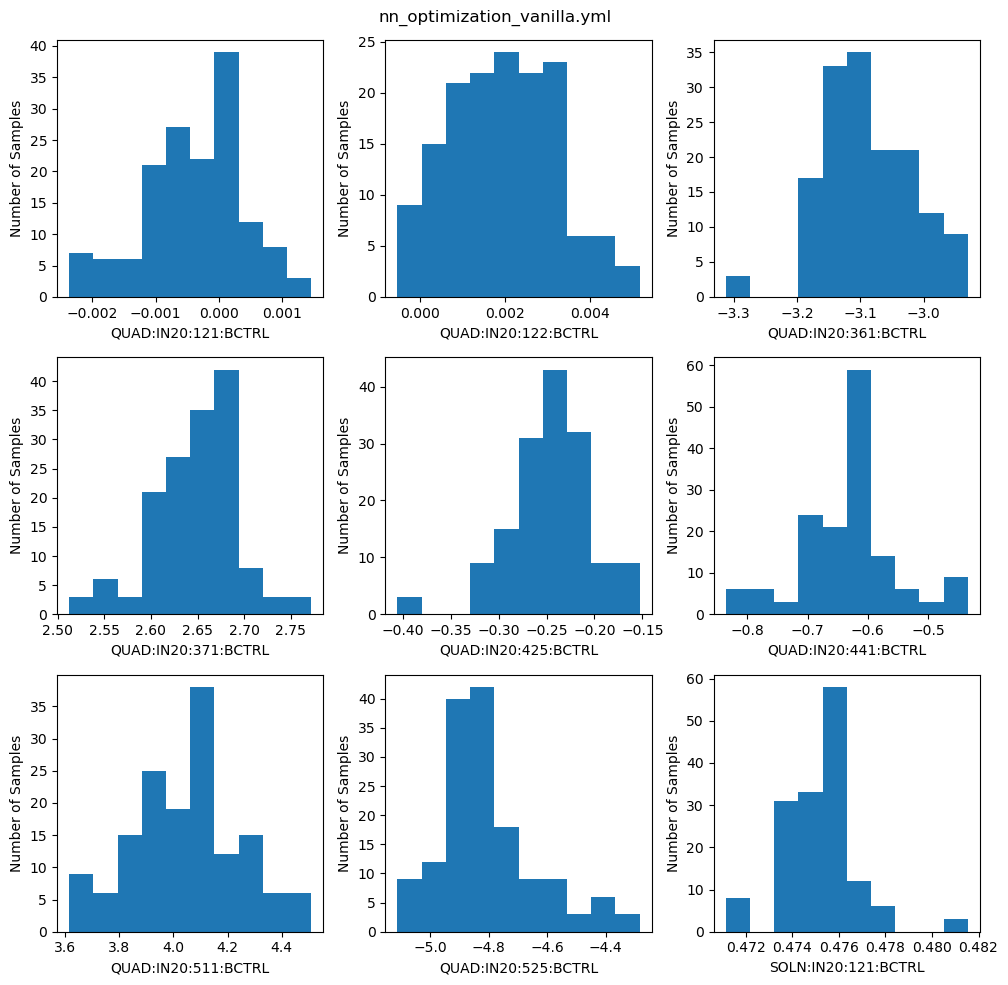

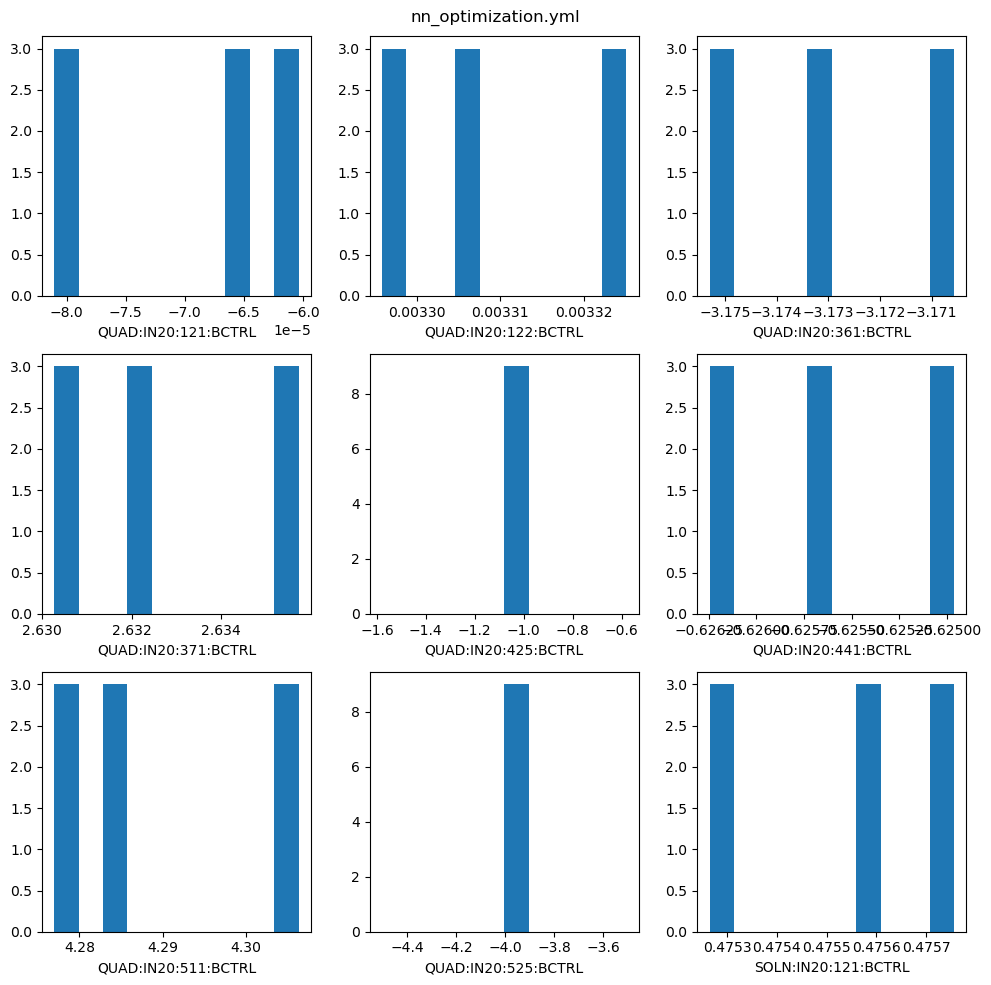

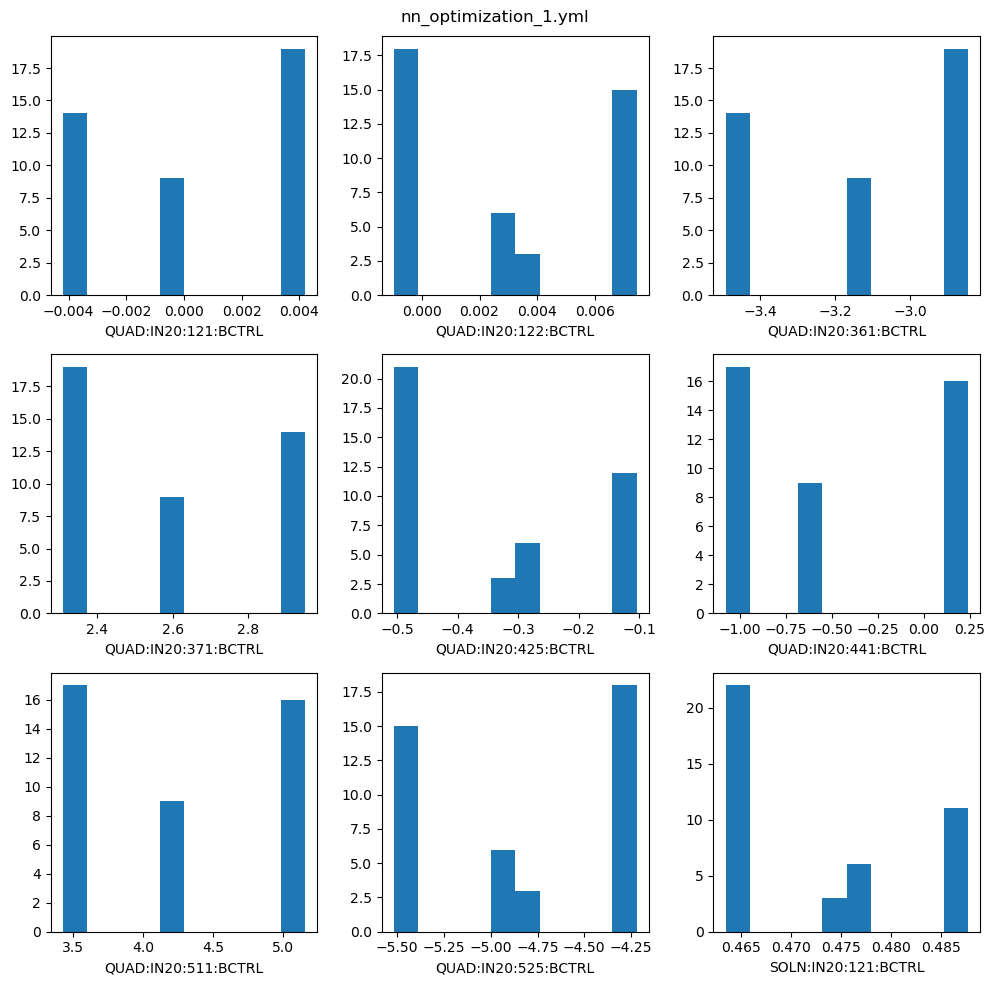

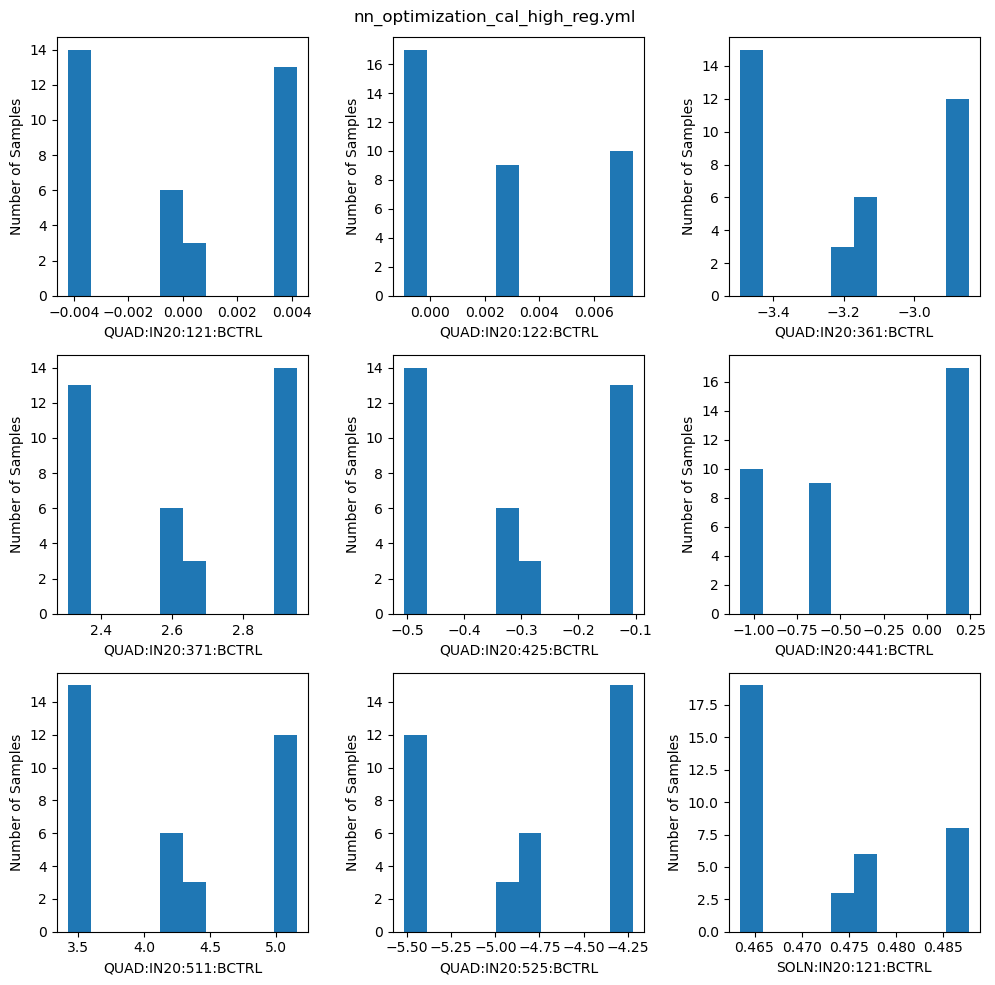

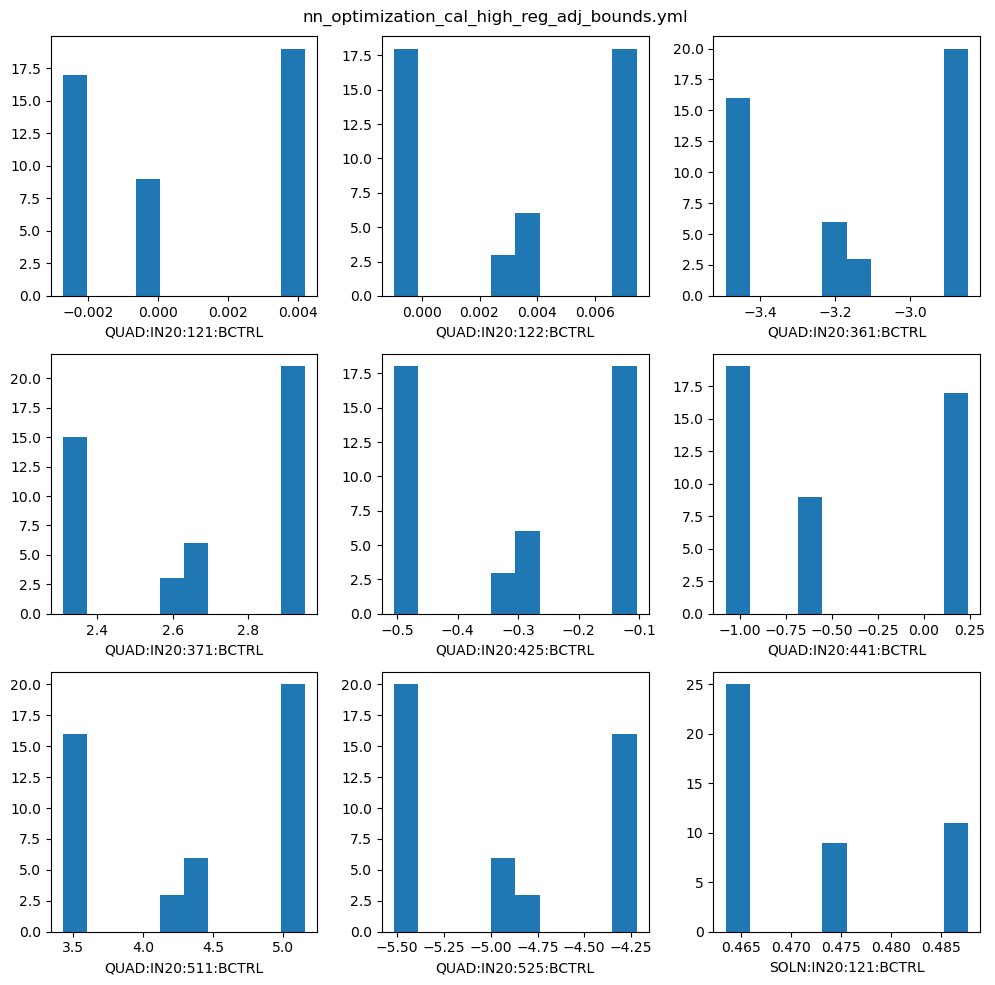

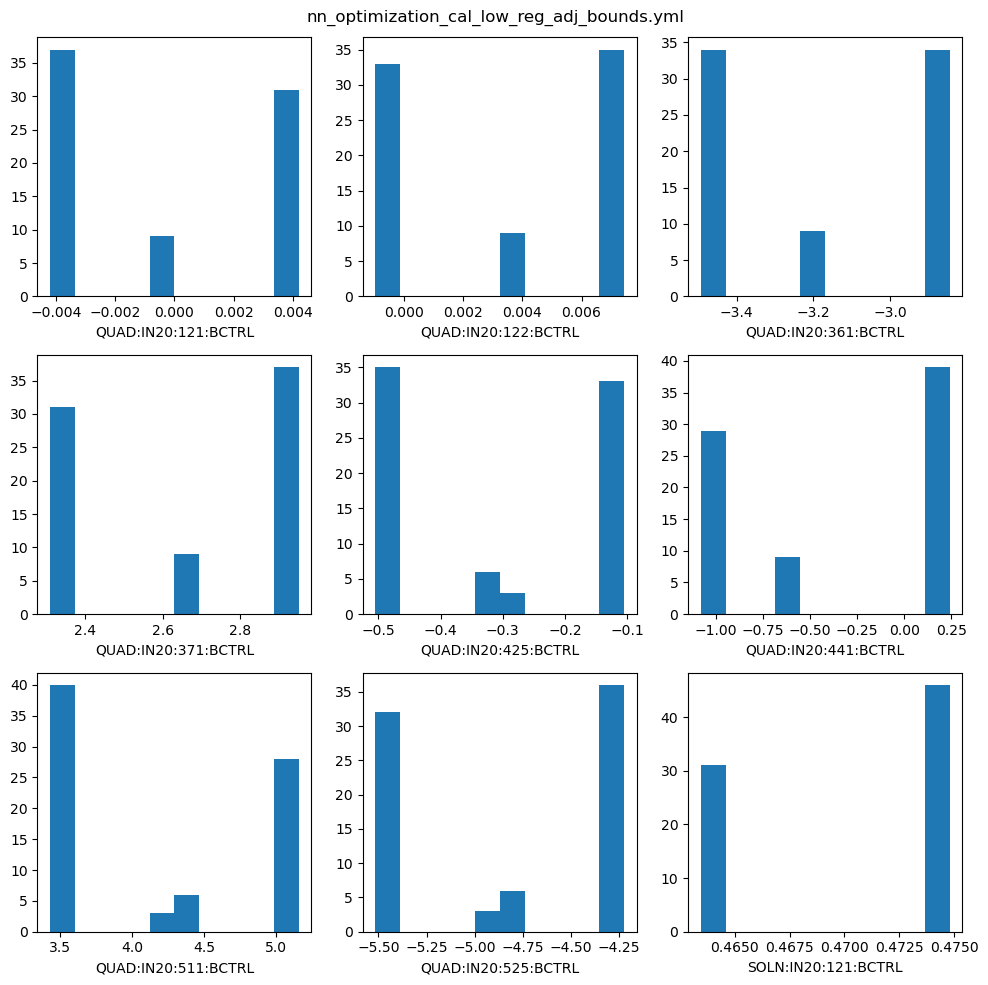

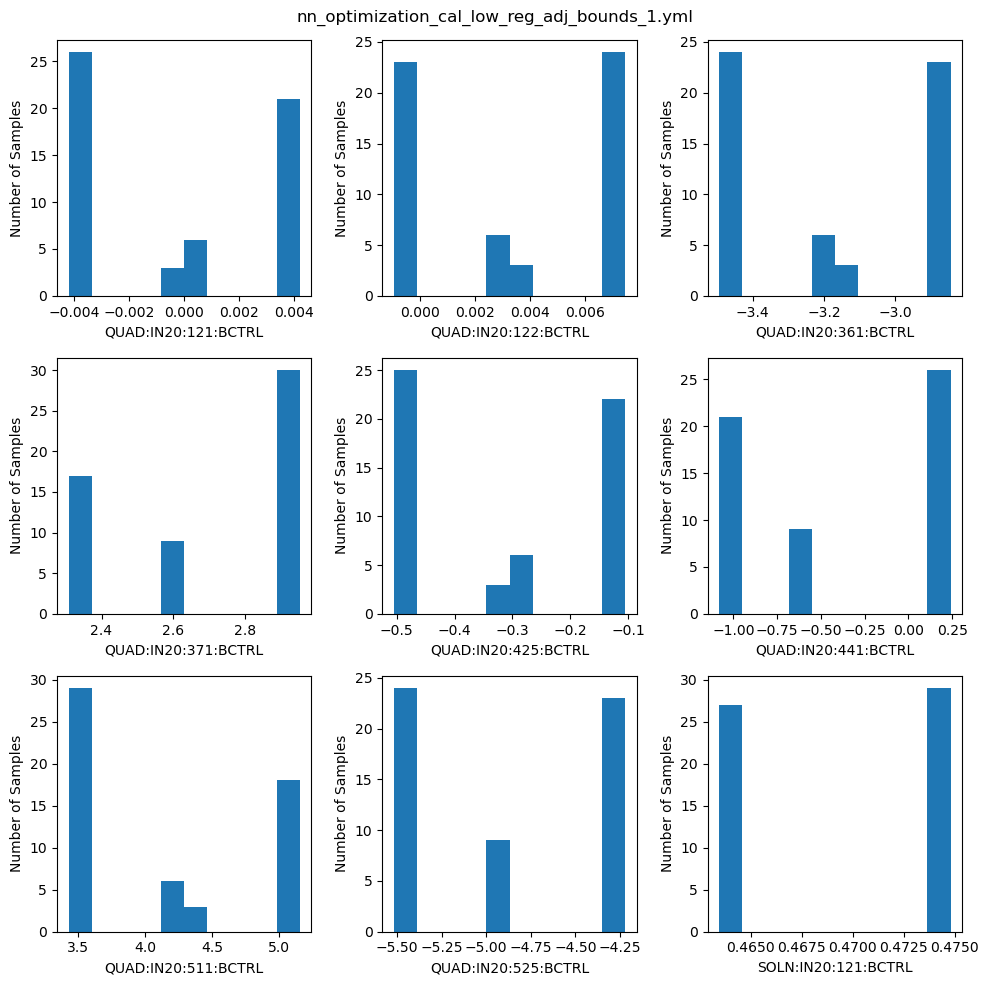

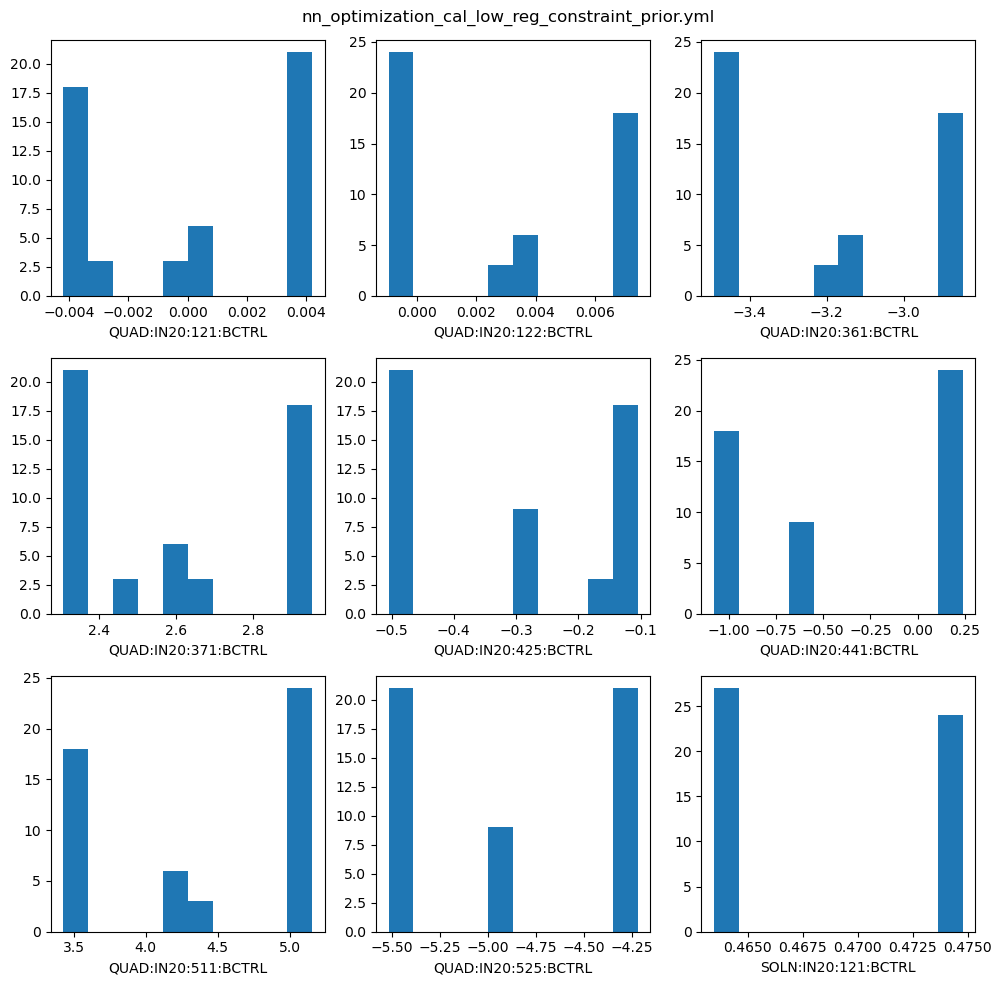

In [5]:
nrows, ncols = 3, 3
variable_names = list(vocs["variables"].keys())

for i, file in enumerate(files):
    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    df = dfs[i]
    
    for j in range(len(variable_names)):
        ax = axs[j // ncols, j % nrows]
        ax.hist(df[variable_names[j]].values, bins=10)
        ax.set_xlabel(variable_names[j])
        if i % nrows == 0:
            ax.set_ylabel("Number of Samples")
    
    fig.suptitle(os.path.basename(file))
    fig.tight_layout()